
<font size="6"> Final Project Image Processing 2020-21 </font>

<font size="5"> Harris Corners Detection </font>


### This project we implement Harris Corners Detectors
#### steps 
1. The first step is to convert it into a grayscale image, which will enhance the processing speed.

2. Compute image gradients $I_{x}(x,y)$ and $I_{y}(x,y)$ .

3. Compute products of the derivatives  $I_{x^2}(x,y) = I_{x}(x,y)\times I_{x}(x,y)$ , $I_{xy}(x,y) = I_{x}(x,y)\times I_{y}(x,y)$ , $I_{y^2}(x,y) = I_{y}(x,y)\times I_{y}(x,y)$.

4. Filtering the product with the Gaussian filter. 
5. Define at each pixel $(x,y)$ the matrix,
$ {\displaystyle M(x,y) ={\underset {(x,y)\in W}{\sum }}{\begin{bmatrix}I_{x}^{2}&I_{x}I_{y}\\I_{x}I_{y}&I_{y}^{2}\end{bmatrix}}={\begin{bmatrix}{\underset {(x,y)\in W}{\sum }}I_{x}^{2}&{\underset {(x,y)\in W}{\sum }}I_{x}I_{y}\\{\underset {(x,y)\in W}{\sum }}I_{x}I_{y}&{\underset {(x,y)\in W}{\sum }}I_{y}^{2}\end{bmatrix}}}$
6. Compute the response of the detector at each pixel. $$R(i,j)=\mathtt{det}(M)-K\cdot[\mathtt{trace}(M)]^2$$
$$ K = 0.06$$ 
7. Threshold on value of R and perform non-maxima suppression.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Import the image and transfer it to gray

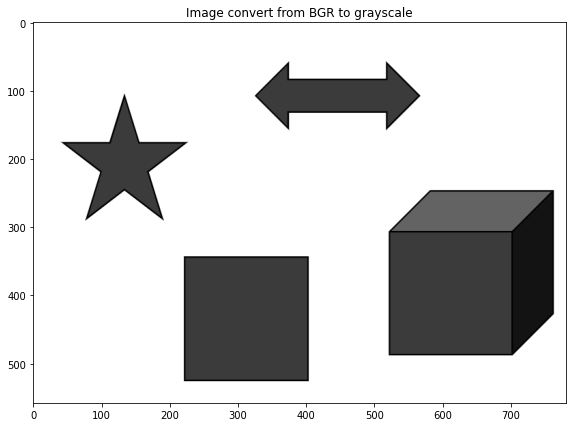

In [ ]:
img = cv2.imread('test2.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,7))
plt.imshow(img_gray ,cmap = 'gray')
plt.title('Image convert from BGR to grayscale')
plt.show()

Useing Sobel operators to calculate image gradients:
$I_{x}(x,y)$ and $I_{y}(x,y)$

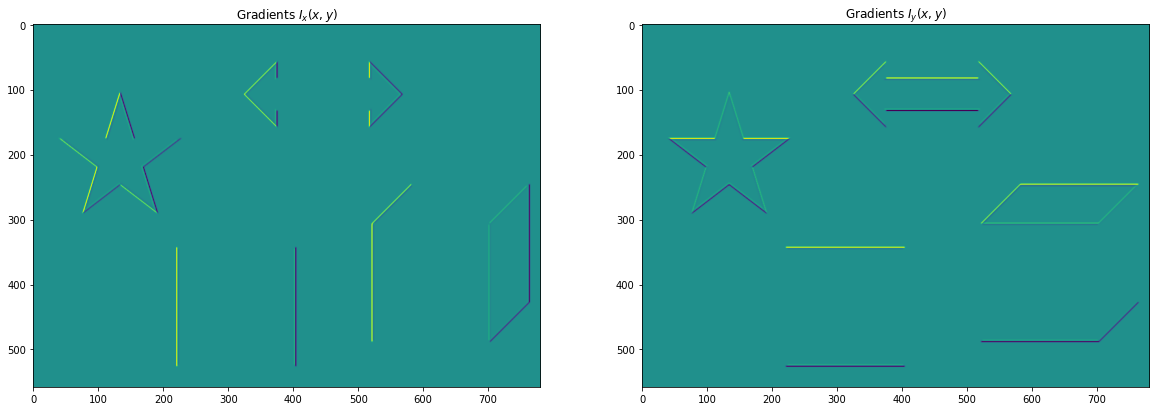

In [ ]:
Dx = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])


Dy = np.array([[1,2,1],
              [0,0,0],
              [-1,-2,-1]])


Ix = cv2.filter2D(img_gray,cv2.CV_64F,Dx) 
Iy = cv2.filter2D(img_gray,cv2.CV_64F,Dy)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(Ix)
plt.title('Gradients $I_{x}(x,y)$')
# plt.grid()
plt.subplot(122)
plt.imshow(Iy)
plt.title('Gradients $I_{y}(x,y)$')
# plt.grid()

plt.show()



Compute $I_{x^2}(x,y) = I_{x}(x,y)\times I_{x}(x,y)$ , $I_{xy}(x,y) = I_{x}(x,y)\times I_{y}(x,y)$ , $I_{y^2}(x,y) = I_{y}(x,y)\times I_{y}(x,y)$.

Filtering the product with the Gaussian filter.

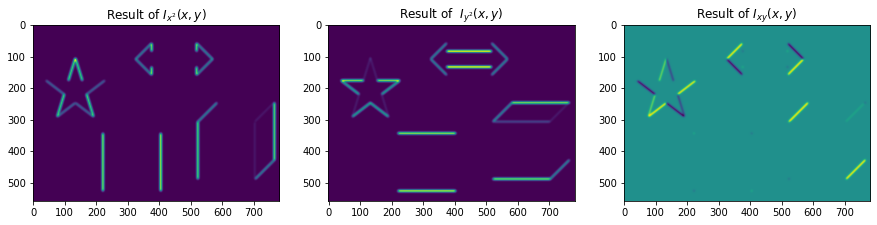

In [ ]:
IxIx = Ix*Ix
IyIy = Iy*Iy
IxIy = Ix*Iy

IxIx = cv2.GaussianBlur(IxIx,(0,0),3)
IyIy = cv2.GaussianBlur(IyIy,(0,0),3)
IxIy = cv2.GaussianBlur(IxIy,(0,0),3)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(IxIx)
plt.title('Result of $I_{x^2}(x,y)$')
# plt.grid()
plt.subplot(132)
plt.imshow(IyIy)
plt.title('Result of  $I_{y^2}(x,y)$')
# plt.grid()
plt.subplot(133)
plt.imshow(IxIy)
plt.title('Result of $I_{xy}(x,y)$ ')
# plt.grid()
plt.show()


Compute the response of the detector at each pixel. $$R(i,j)=\mathtt{det}(M)-K\cdot[\mathtt{trace}(M)]^2$$
$$ K = 0.06$$ 

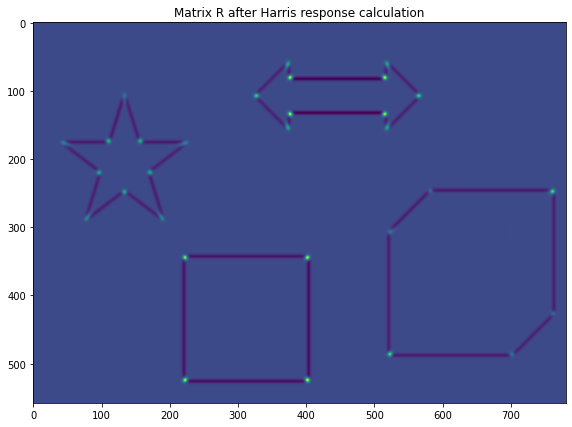

In [ ]:
Det_M = IxIx * IyIy - IxIy * IxIy
Tr_M = ( IxIx + IyIy ) ** 2
K = 0.06 
R = Det_M - K * Tr_M

plt.figure(figsize = (10,7))
plt.imshow(R)
plt.title('Matrix R after Harris response calculation')
plt.show()


We will expand the points so that we can see the corners better
using the function cv2.dilate
after the function a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases

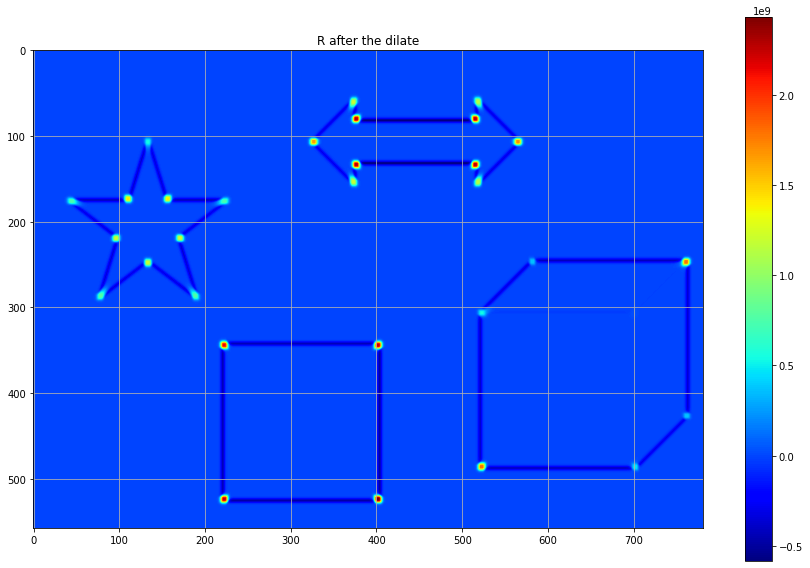

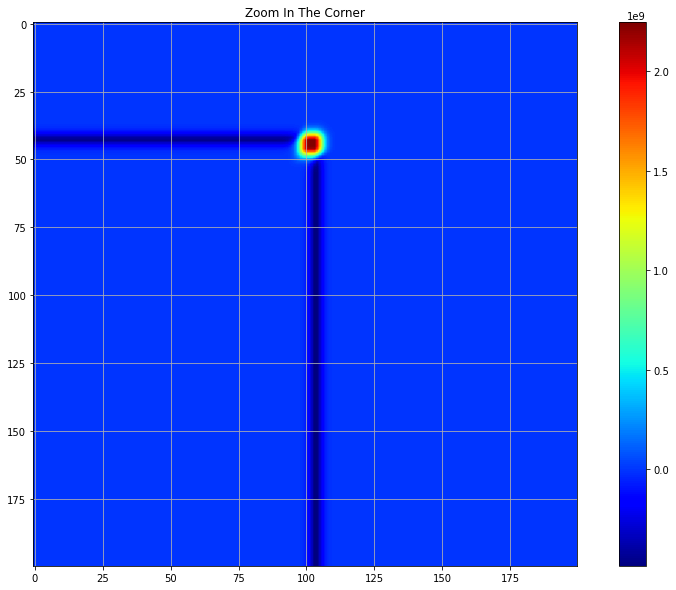

In [ ]:
R_Dilate = cv2.dilate(R, kernel = np.ones((3,3)))
plt.figure(figsize=(15,10))

# plt.subplot(121)
plt.imshow(R_Dilate , cmap ='jet')
plt.title('R after the dilate')
plt.grid()
plt.colorbar()
plt.show()
plt.figure(figsize=(15,10))
ZoomInTheCorner = R_Dilate[300:500,300:500]
# plt.subplot(122)
plt.imshow(ZoomInTheCorner , cmap ='jet')
plt.title('Zoom In The Corner')
plt.grid()
plt.colorbar()

plt.show()

In [ ]:
R_Dilate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

threshold

We will activate a certain threshold to leave only the highest concentrations of points

The smaller the threshold, the more points


In [ ]:
R_Threshold = R > R.max() * 0.0001
R_Threshold

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

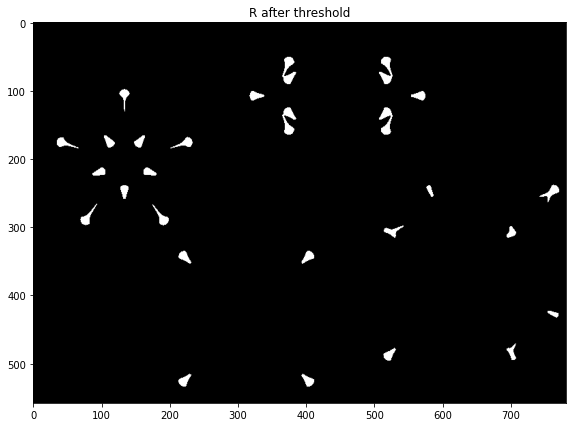

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(R_Threshold , cmap='gray')
plt.title('R after threshold')
# plt.grid()
plt.show()

Non-Maxima Suppression (NMS)


In [ ]:
R_NMS = R >= R_Dilate
R_NMS

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

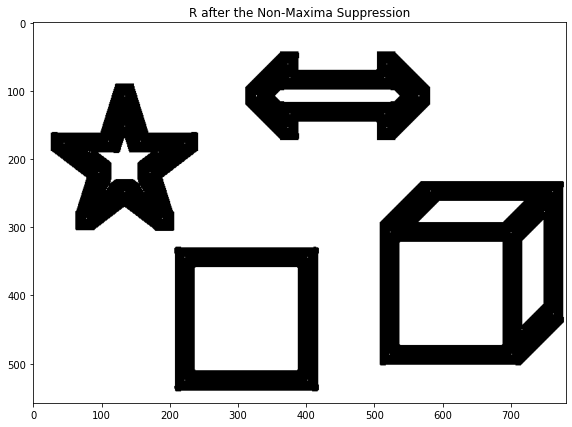

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(R_NMS, cmap='gray')
plt.title('R after the Non-Maxima Suppression')
# plt.grid()
plt.show()

threshold and NMS

In [ ]:
R_Final = R_Threshold * R_NMS
R_Final

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

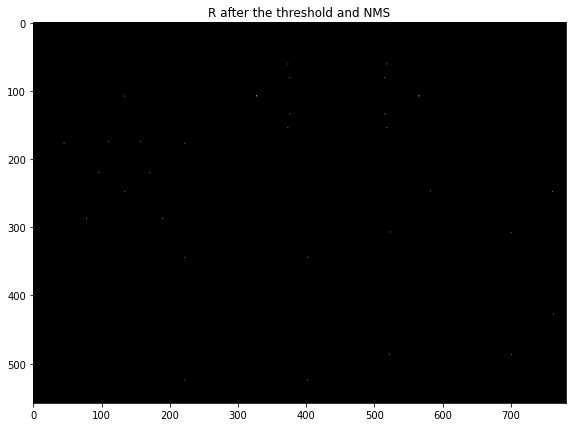

In [ ]:
plt.figure(figsize=(10,7))
plt.title('R after the threshold and NMS')
plt.imshow(R_Final , cmap='gray')
# plt.grid()
plt.show()


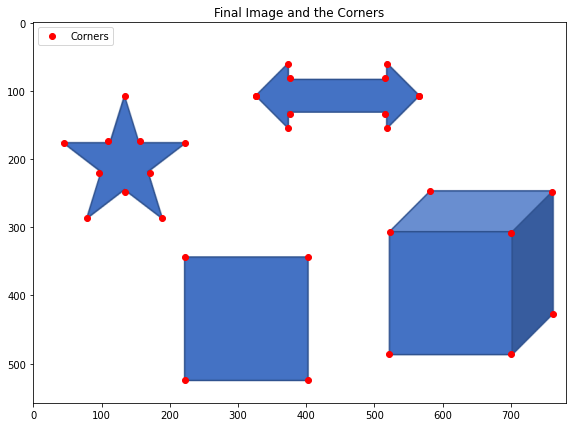

In [ ]:
[y,x] = np.nonzero(R_Final)

plt.figure(figsize=(10,7))
plt.imshow(img)
plt.plot(x,y,'or',label = 'Corners')
plt.title('Final Image and the Corners')
plt.legend(loc = "upper left")
plt.show()


## Final algorithm

In [ ]:
def MyHarrisCornersDetection (i_Img, i_GaussianSize, i_Threshold, i_K = 0.06):
    
    img_gray = cv2.cvtColor(i_Img, cv2.COLOR_BGR2GRAY)
    
    Ix,Iy = np.gradient(img_gray)
    IxIx = np.power(Ix ,2)
    IyIy = np.power(Iy ,2)
    IxIy = Ix * Iy
    
    IxIx = cv2.GaussianBlur(IxIx,(0,0),i_GaussianSize) 
    IyIy = cv2.GaussianBlur(IyIy,(0,0),i_GaussianSize)
    IxIy = cv2.GaussianBlur(IxIy,(0,0),i_GaussianSize)

    Det_M = IxIx * IyIy - np.power(IxIy , 2)
    Tr_M = np.power((IxIx + IyIy), 2)
    R = Det_M - i_K * Tr_M
    
    R_Dilate = cv2.dilate(R, kernel=np.ones((3,3)))
    
    R_Threshold = R > R.max()*i_Threshold
    R_NMS = R >= R_Dilate
    R_Final = R_Threshold * R_NMS 
    
    y,x = np.nonzero(R_Final)
    
    return x,y


## Some Examples

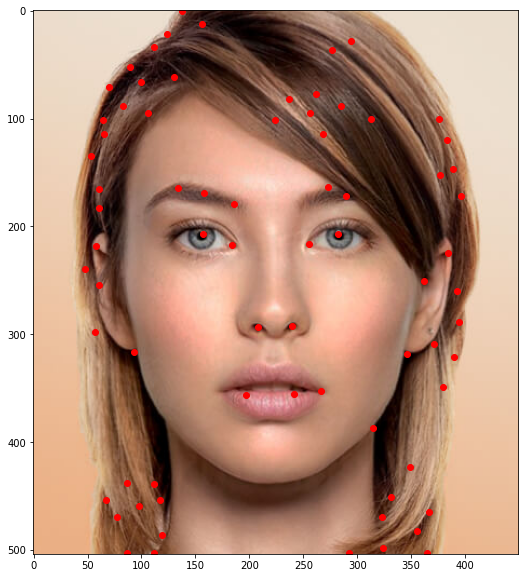

In [ ]:
img = cv2.imread('FAce.jpg')

X,Y = MyHarrisCornersDetection(img,5,0.0023)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.plot(X,Y,'or')
plt.show()

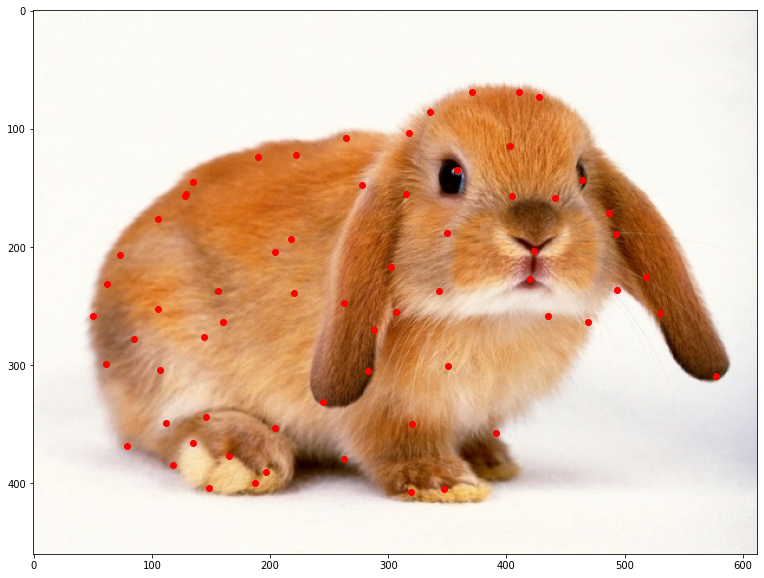

In [ ]:
img = cv2.imread('rabbit.jpg')

X,Y = MyHarrisCornersDetection(img,7,0.0001)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.plot(X,Y,'or')
plt.show()


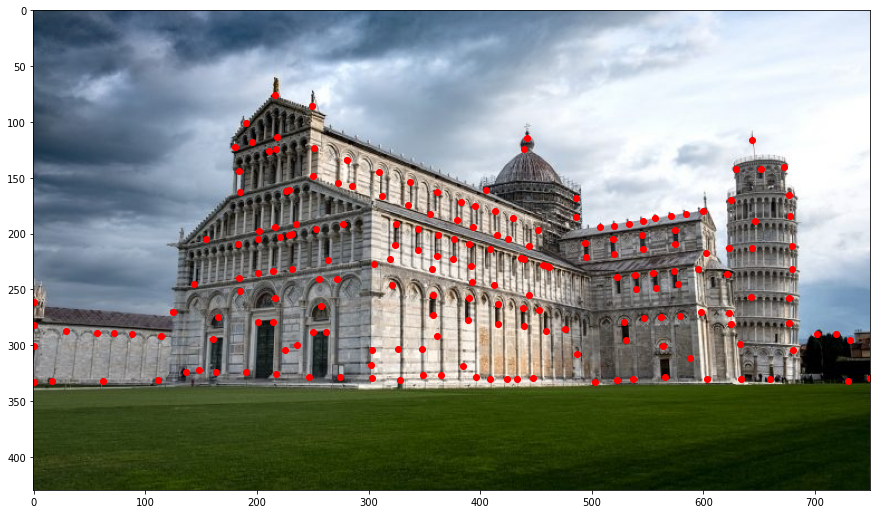

In [ ]:
img = cv2.imread('pisa01.jpg')

X,Y = MyHarrisCornersDetection(img,5,0.001)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.plot(X,Y,'or')
plt.show()
